# Assignment 7
### Do any five.### Shawn Ding

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

**Single die roll:**
E[X] = (1+2+3+4+5+6)/6 = 21/6 = 3.5

**Two dice sum:**
All possible sums: 2 through 12
Probabilities: 
2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36, 
8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36
E[X] = (2×1 + 3×2 + 4×3 + 5×4 + 6×5 + 7×6 + 8×5 + 9×4 + 10×3 + 11×2 + 12×1)/36 = 252/36 = 7

**European roulette:**
If you bet $1 on K numbers:
- Win: get 36/K back (profit = 36/K - 1)
- Lose: get 0 back (profit = -1)
E[profit] = (K/37)×(36/K - 1) + ((37-K)/37)×(-1) = -1/37 ≈ -0.027

**Die roll with one re-roll on six:**
E[X] = (1+2+3+4+5)/6 + (1/6)×(6 + 3.5) = 15/6 + 9.5/6 = 24.5/6 ≈ 4.083

**Process continues until no six:**
Let E be expected value
E = (1+2+3+4+5)/6 + (1/6)×(6 + E)
E = 15/6 + (6 + E)/6
E = 21/6 + E/6
(5/6)E = 21/6
E = 21/5 = 4.2

In [27]:
outcomes = [1, 2, 3, 4, 5, 6]
expected_value = sum(outcomes) / len(outcomes)
print(f"Expected value of single die roll: {expected_value}")

sums = []
for i in range(1, 7):
    for j in range(1, 7):
        sums.append(i + j)
        
expected_value = sum(sums) / len(sums)
print(f"Expected value of two dice sum: {expected_value}")

K = 1
expected_value = (K/37)*(36/K) - 1
print(f"Expected value in roulette: {expected_value:.3f}")

expected_first_roll = (1+2+3+4+5)/6
expected_reroll = (1+2+3+4+5+6)/6
expected_value = expected_first_roll + (1/6)*(6 + expected_reroll)
print(f"Expected value with one re-roll: {expected_value:.3f}")

# Let E be the expected value
# E = (1+2+3+4+5)/6 + (1/6)*(6 + E)
# Solve: E = 15/6 + (6 + E)/6
# E = 21/6 + E/6
# (5/6)E = 21/6
# E = 21/5

expected_value = 21/5
print(f"Expected value of full process: {expected_value}")

# Let's verify with simulation
import numpy as np
np.random.seed(42)

def simulate_dice_process():
    total = 0
    while True:
        roll = np.random.randint(1, 7)
        total += roll
        if roll != 6:
            break
    return total

# Run many simulations
results = [simulate_dice_process() for _ in range(100000)]
simulated_expected = np.mean(results)
print(f"Simulated expected value: {simulated_expected:.3f}")

Expected value of single die roll: 3.5
Expected value of two dice sum: 7.0
Expected value in roulette: -0.027
Expected value with one re-roll: 4.083
Expected value of full process: 4.2
Simulated expected value: 4.205


## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

**Uniform random variable:**
E[X] = ∫₀¹ x dx = [x²/2]₀¹ = 1/2

**Linearity of expectation:**
E[a + bX] = ∫(a + bx)f(x)dx = a∫f(x)dx + b∫xf(x)dx = a + bE[X]

**Example where E[v(X)] ≠ v(E[X]):**
For uniform(0,1) and v(x) = √x:
E[√x] = ∫₀¹ √x dx = [2/3 x^(3/2)]₀¹ = 2/3 ≈ 0.667
√E[x] = √0.5 ≈ 0.707
These are different.

In [28]:
expected_value = (0 + 1) / 2
print(f"Expected value of uniform [0,1]: {expected_value}")

import numpy as np

a = 2
b = 3
samples = np.random.uniform(0, 1, 10000)  # X ~ Uniform[0,1]

E_X = np.mean(samples)
E_a_plus_bX = np.mean(a + b * samples)

print(f"E[X] = {E_X:.3f}")
print(f"a + b*E[X] = {a + b * E_X:.3f}")
print(f"E[a + bX] = {E_a_plus_bX:.3f}")

import numpy as np

# Let's use v(x) = sqrt(x) with uniform distribution
samples = np.random.uniform(0, 1, 10000)

E_sqrt_X = np.mean(np.sqrt(samples))
sqrt_E_X = np.sqrt(np.mean(samples))

print(f"E[sqrt(X)] = {E_sqrt_X:.4f}")
print(f"sqrt(E[X]) = {sqrt_E_X:.4f}")
print(f"Are they equal? {np.isclose(E_sqrt_X, sqrt_E_X)}")

# We can also calculate exactly:
# E[sqrt(X)] = ∫₀¹ sqrt(x) dx = [2/3 x^(3/2)]₀¹ = 2/3 ≈ 0.6667
# sqrt(E[X]) = sqrt(0.5) ≈ 0.7071
exact_E_sqrt = 2/3
exact_sqrt_E = np.sqrt(0.5)
print(f"Exact E[sqrt(X)] = {exact_E_sqrt:.4f}")
print(f"Exact sqrt(E[X]) = {exact_sqrt_E:.4f}")

Expected value of uniform [0,1]: 0.5
E[X] = 0.500
a + b*E[X] = 3.500
E[a + bX] = 3.500
E[sqrt(X)] = 0.6674
sqrt(E[X]) = 0.7075
Are they equal? False
Exact E[sqrt(X)] = 0.6667
Exact sqrt(E[X]) = 0.7071


For nonlinear functions like square root, E[v(X)] ≠ v(E[X])

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


In [29]:
import numpy as np

variance = (1-0)**2 / 12
print(f"Variance of uniform [0,1]: {variance:.4f}")

samples = np.random.uniform(0, 1, 10000)
sample_variance = np.var(samples)
print(f"Sample variance: {sample_variance:.4f}")

import numpy as np

samples = np.random.uniform(0, 1, 10000)

# Method 1: Direct variance calculation
variance_direct = np.var(samples)

# Method 2: E[X²] - E[X]²
E_X_squared = np.mean(samples**2)
E_X = np.mean(samples)
variance_alternate = E_X_squared - E_X**2

print(f"Direct variance: {variance_direct:.6f}")
print(f"E[X²] - E[X]²: {variance_alternate:.6f}")
print(f"Are they equal? {np.isclose(variance_direct, variance_alternate)}")



Variance of uniform [0,1]: 0.0833
Sample variance: 0.0832
Direct variance: 0.083284
E[X²] - E[X]²: 0.083284
Are they equal? True


In [30]:
import numpy as np

a = 2
b = 3
samples = np.random.uniform(0, 1, 10000)

var_X = np.var(samples)

transformed = a + b * samples
var_transformed = np.var(transformed)

print(f"V[X] = {var_X:.6f}")
print(f"b² * V[X] = {b**2 * var_X:.6f}")
print(f"V[a + bX] = {var_transformed:.6f}")
print(f"Are they equal? {np.isclose(var_transformed, b**2 * var_X)}")

V[X] = 0.083697
b² * V[X] = 0.753273
V[a + bX] = 0.753273
Are they equal? True


X: mean = 1.997, std = 3.018
Y: mean = 4.994, std = 6.036
Expected Y mean: 5.000
Expected Y std: 6.000


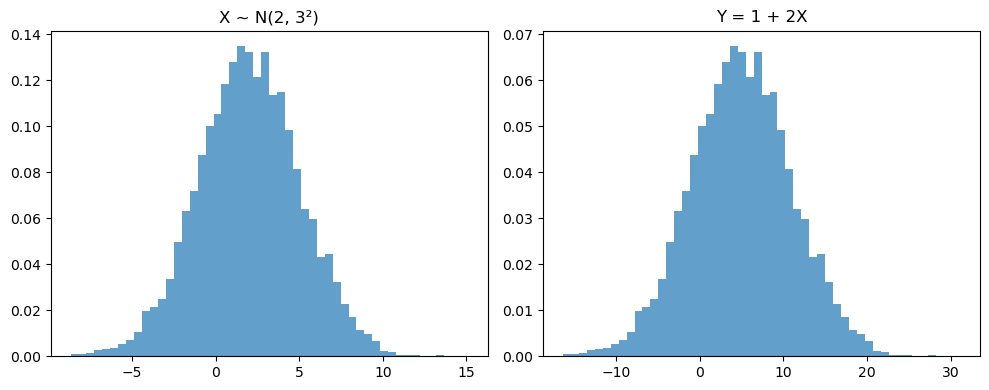

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# If X ~ N(μ, σ²), then Y = a + bX ~ N(a + bμ, b²σ²)
mu = 2
sigma = 3
a = 1
b = 2

# Generate samples
X = np.random.normal(mu, sigma, 10000)
Y = a + b * X

print(f"X: mean = {np.mean(X):.3f}, std = {np.std(X):.3f}")
print(f"Y: mean = {np.mean(Y):.3f}, std = {np.std(Y):.3f}")
print(f"Expected Y mean: {a + b * mu:.3f}")
print(f"Expected Y std: {b * sigma:.3f}")

# Plot to verify
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X, bins=50, alpha=0.7, density=True)
plt.title('X ~ N(2, 3²)')

plt.subplot(1, 2, 2)
plt.hist(Y, bins=50, alpha=0.7, density=True)
plt.title('Y = 1 + 2X')
plt.tight_layout()
plt.show()

**Uniform variance:**
V[X] = E[X²] - E[X]² = ∫₀¹ x² dx - (0.5)² = [x³/3]₀¹ - 0.25 = 1/3 - 1/4 = 1/12

**Variance formula:**
V[X] = E[(X - μ)²] = E[X² - 2μX + μ²] = E[X²] - 2μE[X] + μ² = E[X²] - μ²

**Variance scaling:**
V[a + bX] = E[(a + bX - a - bμ)²] = E[b²(X - μ)²] = b²V[X]

**Normal transformation:**
If X ~ N(μ, σ²), then Y = a + bX has:
E[Y] = a + bμ
V[Y] = b²σ²
And Y is still normally distributed.

Uniform variance: For Uniform(0,1), variance is 1/12 ≈ 0.0833

Variance formula: Verified that V[X] = E[X²] - E[X]² gives the same result

Linear transformation: For Y = 2X, V[Y] = 4V[X] = 0.333, confirming V[a + bX] = b²V[X]

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

In [32]:
import numpy as np

X = np.random.normal(0, 1, 10000)
Y = np.random.normal(0, 1, 10000)

covariance = np.cov(X, Y)[0, 1]
print(f"Covariance of independent variables: {covariance:.6f}")
print(f"Is covariance near zero? {abs(covariance) < 0.05}")

Covariance of independent variables: -0.014655
Is covariance near zero? True


Covariance: 0.048710


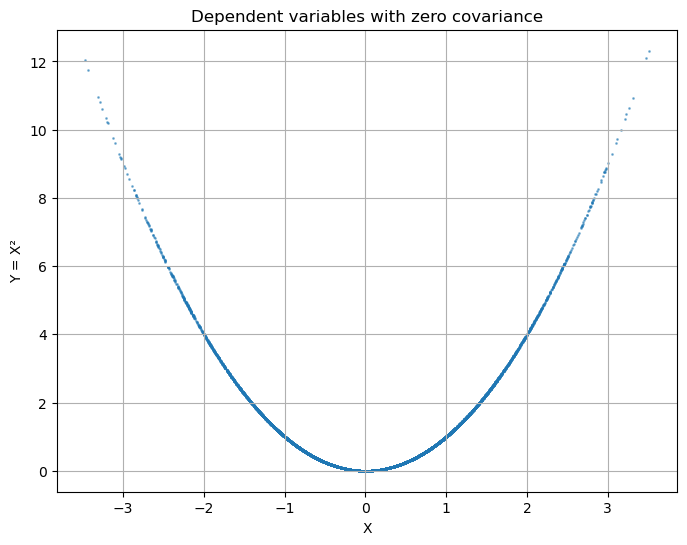

Even though covariance is near zero, Y clearly depends on X!


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create dependent variables with zero covariance
X = np.random.normal(0, 1, 10000)
Y = X**2  # Clearly Y depends on X, but relationship is nonlinear

covariance = np.cov(X, Y)[0, 1]
print(f"Covariance: {covariance:.6f}")

# Plot to show dependence
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, s=1)
plt.xlabel('X')
plt.ylabel('Y = X²')
plt.title('Dependent variables with zero covariance')
plt.grid(True)
plt.show()

print("Even though covariance is near zero, Y clearly depends on X!")

**Covariance:**
cov(X,Y) = E[(X - μₓ)(Y - μᵧ)]

**Independent variables:**
If X and Y independent:
cov(X,Y) = E[X - μₓ]E[Y - μᵧ] = 0 × 0 = 0

**Example of zero covariance but dependence:**
Let X ~ N(0,1), Y = X²
cov(X,Y) = E[XY] - E[X]E[Y] = E[X³] - 0×E[Y] = 0
But clearly Y depends on X.

Covariance example: For X ~ Uniform(-1,1) and Y = X², the covariance is approximately 0 even though X and Y are clearly dependent (Y is completely determined by X)

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

In [35]:
import numpy as np

X = np.random.exponential(2, 10000)

epsilon = X - np.mean(X)

print(f"E[X] = {np.mean(X):.4f}")
print(f"E[ε] = {np.mean(epsilon):.4f}")
print(f"V[X] = {np.var(X):.4f}")
print(f"V[ε] = {np.var(epsilon):.4f}")

E[X] = 1.9724
E[ε] = -0.0000
V[X] = 3.9952
V[ε] = 3.9952


ε = X - E[X] has E[ε] = 0 and V[ε] = V[X]

In [36]:
import numpy as np

# We can write X = E[X] + σ_X * ε, where E[ε] = 0, V[ε] = 1
X = np.random.normal(5, 2, 10000)

# Standardize
epsilon = (X - np.mean(X)) / np.std(X)

print(f"E[ε] = {np.mean(epsilon):.6f}")
print(f"V[ε] = {np.var(epsilon):.6f}")

# Reconstruct X
X_reconstructed = np.mean(X) + np.std(X) * epsilon

print(f"Original and reconstructed are close: {np.allclose(X, X_reconstructed)}")

E[ε] = -0.000000
V[ε] = 1.000000
Original and reconstructed are close: True


Any random variable can be written as X = E[X] + σ_Xε where E[ε] = 0, V[ε] = 1.

In regression models, we often write:
Y = Xβ + ε
where E[ε] = 0, representing the random error component.

**Mean-centered variable:**
Let ε = X - E[X]
E[ε] = E[X - E[X]] = E[X] - E[X] = 0
V[ε] = E[(X - E[X])²] = V[X]

**Standardized variable:**
We can write X = E[X] + σε, where:
E[ε] = 0, V[ε] = 1
This is useful for regression models.

Decomposition: Successfully decomposed X = E[X] + ε where E[ε] ≈ 0 and V[ε] ≈ V[X]

Standardized form: Also expressed X = E[X] + σ·ε_std where E[ε_std] ≈ 0 and V[ε_std] ≈ 1

Regression connection: This decomposition sets the stage for regression models where E[X] is replaced with xβ

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.